Соломянко Алексей Сергеевич

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def true_fun(x, a=np.pi, b = 0, f=np.sin):
  x = np.atleast_1d(x)[:]
  a = np.atleast_1d(a)
  if f is None: f = lambda x:x
  x = np.sum([ai*np.power(x, i+1) for i,ai in enumerate(a)], axis=0)
  return f(x+ b)

def noises(shape , noise_power):
  return np.random.randn(*shape) *noise_power

def dataset(a, b, f = None, N = 250, x_max =1, noise_power= 0, random_x = True, seed = 42):
  np.random.seed(seed)
  if random_x:
    x = np.sort(np.random.rand(N))*x_max
  else:
    x = np.linspace(0,x_max,N)

  y_true = np.array([])

  for f_ in np.append([], f):
    y_true=np.append(y_true, true_fun(x, a, b, f_))

  y_true = y_true.reshape(-1,N).T
  y = y_true + noises(y_true.shape , noise_power)

  return y, y_true, np.atleast_2d(x).T

def vis_data(y, y_true,x, title):
    fig  = plt.figure(figsize=(12,8))
    plt.scatter(x[:,0], y, edgecolor='b', label="Зашумленные Данные",s=196, alpha = 0.6)
    plt.scatter(x[:,0], y_true,label="Реальные Данные", s=81,c='g', alpha = 0.8)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title, fontsize=25 )
    plt.tight_layout()

def train_test_split(x,y, train_size=None, test_size=None, random_state=42, shuffle=True,):
    if random_state: np.random.seed(random_state)

    size = y.shape[0]
    idxs = np.arange(size)
    if shuffle: np.random.shuffle(idxs)

    if test_size and train_size is None:
        if (test_size<= 1):  train_size = 1 - test_size
        else:  train_size = size - test_size
        test_size = None

    if train_size is None or train_size > size: train_size = size

    if (train_size<= 1): train_size *= size

    if test_size is not None:
        if test_size<= 1: test_size *= size
        if test_size>size: test_size = size-train_size
    else: test_size = 0

    x_train, y_train = x[idxs[:int(train_size)]], y[idxs[:int(train_size)]]
    x_val,   y_val   = x[idxs[int(train_size):size - int(test_size)]], y[idxs[int(train_size):size - int(test_size)]]

    if test_size > 0:
        x_test, y_test = x[idxs[size - int(test_size):]], y[idxs[size - int(test_size):]]
        return x_train, y_train.squeeze(), x_val, y_val.squeeze(), x_test, y_test.squeeze()
    return x_train, y_train.squeeze(), x_val, y_val.squeeze()

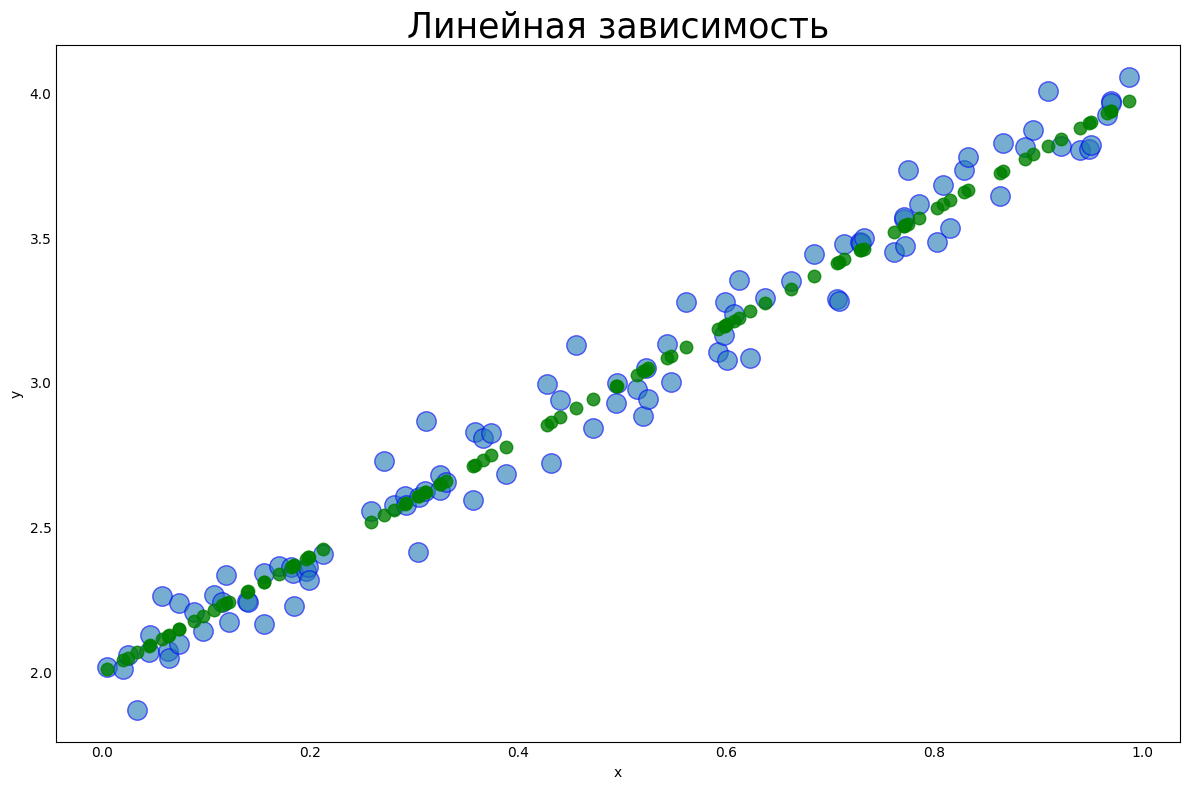

In [ ]:
noise_power = 0.1

y, y_true, x = dataset(a = 2, b = 2,
                       f = None,  N = 100,
                       x_max =1,
                       noise_power = noise_power,
                       seed = 42)
vis_data(y, y_true,x, 'Линейная зависимость')

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = train_test_split(x, y, train_size = 0.5, test_size=0.3, )
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape,  x_test.shape, y_test.shape )

x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, )
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )

(50, 1) (50,) (20, 1) (20,) (30, 1) (30,)
(70, 1) (70,) (30, 1) (30,)


In [ ]:
def init_weights(W_shape, add_bias = True, random_state = 42):
  W_shape = np.atleast_1d(W_shape)
  if random_state:
      np.random.seed(random_state)
  W = np.random.randn(*list(W_shape))/np.sqrt(np.sum(W_shape))
  if add_bias:
      W = np.column_stack((np.zeros(W.shape[-1]),W ))
  return W.squeeze()

def predict( X, W, add_bias = True):
  if add_bias:
      X_full = np.column_stack((np.ones(X.shape[0]),X))
  else:
      X_full = X
  return  np.dot(X_full,W)

def loss_func(yhat, y):
  return np.square(yhat - y)

In [ ]:
x_train[:1]

weights = init_weights(x.shape[1])
yhat = predict( x_train[0],weights)
loss = loss_func(yhat, y[0])

print(f'{weights}')
print(f'predict {yhat},\nground truth {y[0]},\nloss: {loss}')

[0.         0.49671415]
predict [0.4015424],
ground truth [2.01974894],
loss: [2.6185924]


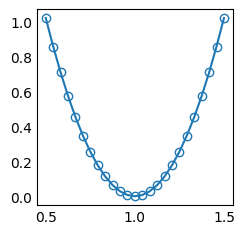

In [ ]:
decline = np.linspace(start = 0.5, stop = 1.5,num = 25)
yhat = decline* y[0]
loss = loss_func(yhat, y[0])
plt.plot(decline,loss,'-o', mfc = 'none'); plt.grid();

In [ ]:
def grad_loss(y_hat, y, X, add_bias = True):
    if add_bias:
        X_full = np.column_stack((np.ones(X.shape[0]),X))
    else:
        X_full = X
    return 2*np.dot(X_full.T, (y_hat - y)) / y.size

In [ ]:
yhat = predict(x_train[0], weights)

grad = grad_loss(yhat, y[0], x[0])
print(grad)

[-3.23641307 -0.01787185]


In [ ]:
def update_weights(grad, W, learning_rate):
    return W - learning_rate*grad

In [ ]:
lerning_rate = 0.1
weights = update_weights(grad, weights, lerning_rate)
print(weights)

[0.32364131 0.49850134]


In [ ]:
yhat = predict( x_train[0],weights)
loss = loss_func(yhat, y[0])

print(f'{weights}')
print(f'predict {yhat},\nground truth {y[0]},\nloss: {loss}')

[0.32364131 0.49850134]
predict [0.72662847],
ground truth [2.01974894],
loss: [1.67216056]


In [ ]:
def fit(X, y, learning_rate, weights = None,  epochs=30):

    if weights is None: weights = init_weights(X.shape[1])
    cost    = np.zeros(epochs)

    for i in range(epochs):
        yhat    = predict(X,weights)
        grad    = grad_loss(yhat,  y, X)
        weights = update_weights(grad, weights, lerning_rate)
        cost[i] = loss_func(yhat,  y).mean()

    return weights, cost

In [ ]:
weights, cost = fit(x_train, y_train, learning_rate=0.1, epochs=10)

In [ ]:
def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 4, markersize = 15);
    plt.grid()
    plt.xlabel("Эпоха",fontsize=35)
    plt.ylabel("Функция Потерь",fontsize=35)


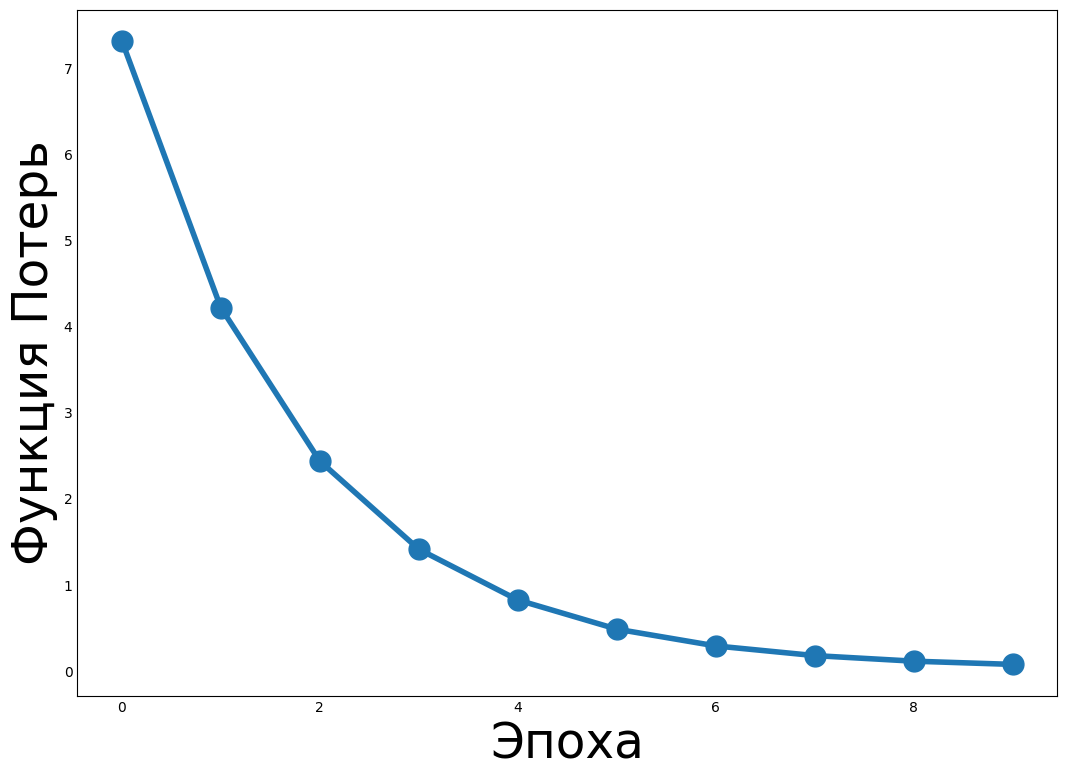

In [ ]:
fig  = plt.figure(figsize=(10,7))

plot_cost(cost)

In [ ]:
def r2_score(yhat, y):
    return 1-(np.square(y-yhat)).sum(axis=0)/(np.square(y-np.mean(y, axis=0))).sum(axis=0)

In [ ]:
predicts = predict( x_test,weights,)

r2_score(predicts, y_test), r2_score(predict(x_train,weights, ), y_train)

(0.818294732486739, 0.8570755941810686)

In [ ]:
def plot_model_weights(x_train, y_train, x_test, x, y, weights):
    plt.plot(x_train[:,0], predict(x_train,weights, ),
            '.', label='Предсказание на x_train',
            markersize = 15)
    plt.plot(x_test[:,0], predict(x_test,weights, ),
            'o', label='Предсказание на x_test',
            markersize = 15, alpha =0.8)
    plt.plot(x_train[:,0], y_train, '.',
            label="Тренировочные данные", linewidth=2,c='r')
    plt.plot(x[:,0], y, '--',
            label="Истинные Значения", linewidth=4,c='g')
    plt.legend(fontsize=20); plt.grid()
    plt.xlabel('x')
    plt.ylabel('y');


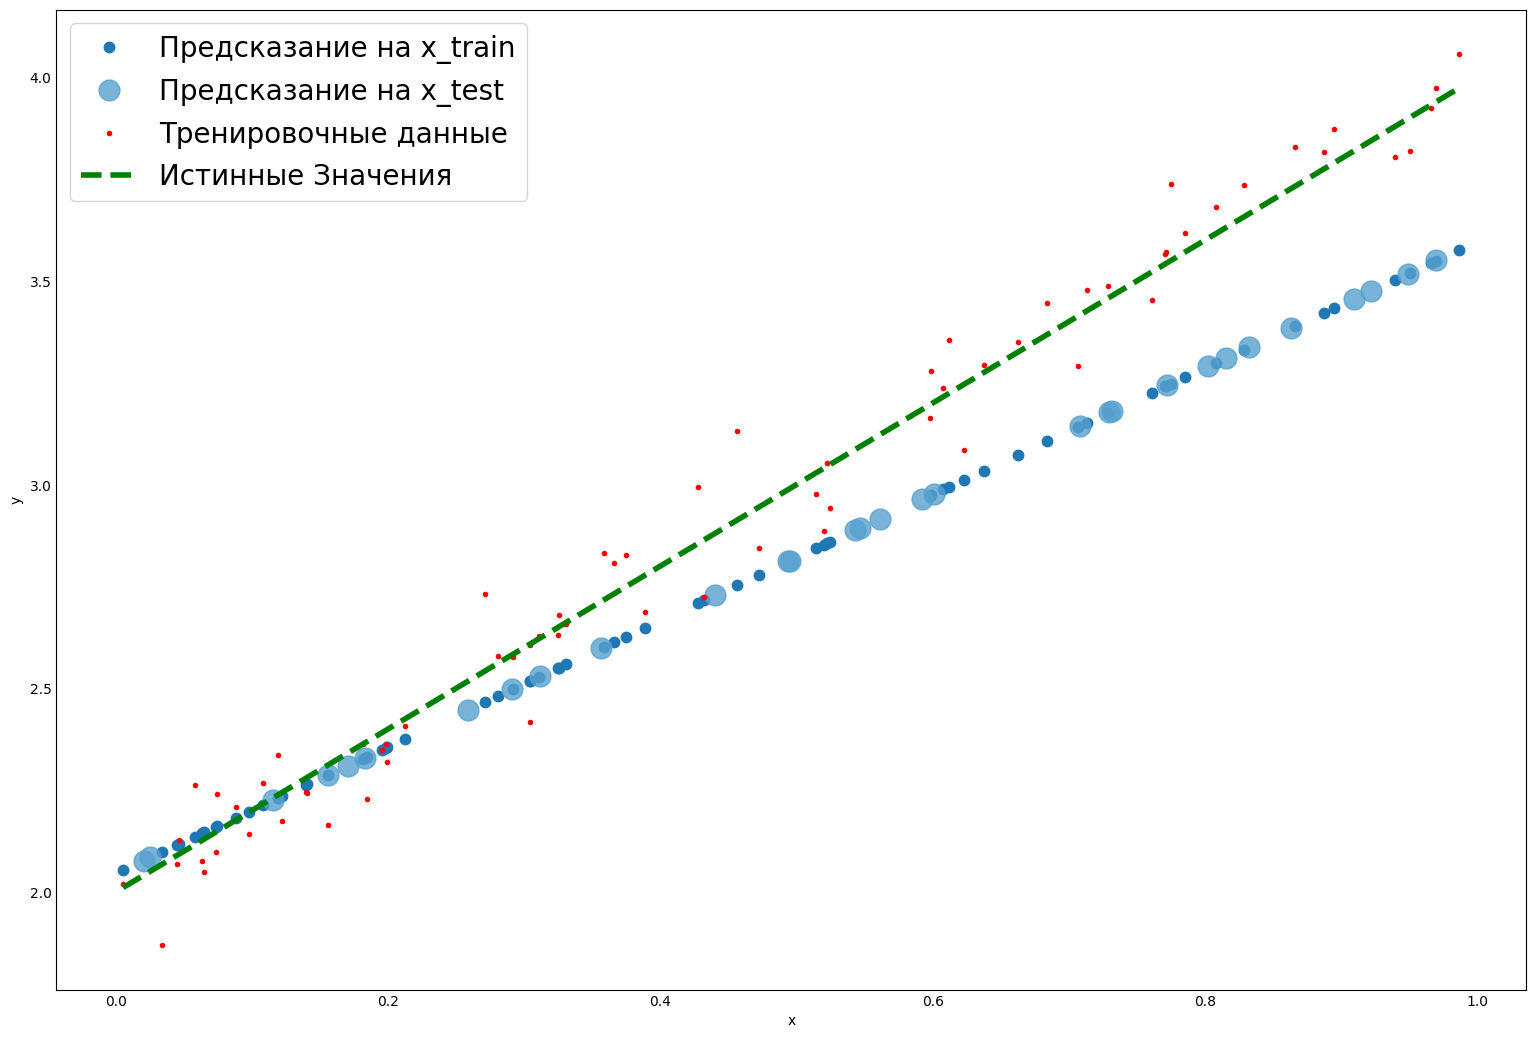

In [ ]:
fig  = plt.figure(figsize=(15,10))

plot_model_weights(x_train, y_train, x_test, x, y_true, weights)

In [ ]:
weights

array([2.04548417, 1.55145866])

In [ ]:
def vis_weigths(weights):
    numbers = np.arange(0,len(weights))
    tick_labels = ['w'+str(num) for num in numbers]
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels );

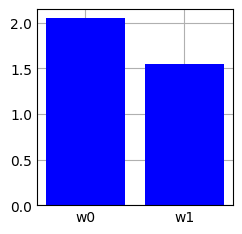

In [ ]:
vis_weigths(weights)

In [ ]:
def load_batch(X,y, batch_size = 100):
    idxs = np.arange(y.size)
    np.random.shuffle(idxs)

    for i_batch in range(0,y.size,batch_size):
        idx_batch = idxs[i_batch:i_batch+batch_size]
        x_batch   = np.take(X, idx_batch,axis=0)
        y_batch   = np.take(y, idx_batch)
        yield  x_batch, y_batch

In [ ]:
BATCH = 10

def fit_SGD(X, y, lerning_rate, weights = None,  epochs=30, batch_size = 100, random_state = 42):

    if random_state: np.random.seed(random_state)

    if weights is None: weights = init_weights(X.shape[1])
    if batch_size is None or batch_size>y.size : batch_size = y.size
    n_batches = y.size//batch_size

    cost    = np.zeros(epochs)

    for i in range(epochs):
        loss = 0
        for cnt,(x_batch, y_batch) in enumerate(load_batch(X,y, batch_size)):

            yhat    = predict(x_batch, weights)
            grad    = grad_loss(yhat,  y_batch, x_batch)
            weights = update_weights(grad, weights, lerning_rate) #backward
            loss   += loss_func(yhat,  y_batch).mean()

            if cnt>= n_batches:
                break
        cost[i] = loss/n_batches

    return weights, cost

In [ ]:
weights = init_weights(x_train.shape[1], random_state=42)

weights, cost = fit_SGD(x_train, y_train, lerning_rate=0.1, batch_size = 10,  epochs=10)

predicts = predict(x_test, weights, )
r2_score(predicts, y_test), r2_score(predict(x_train,weights, ), y_train)

(0.9715819769095048, 0.9685919335230442)

In [ ]:
weights


array([2.08073489, 1.85005883])

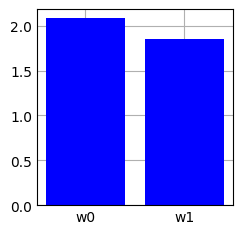

In [ ]:
vis_weigths(weights)

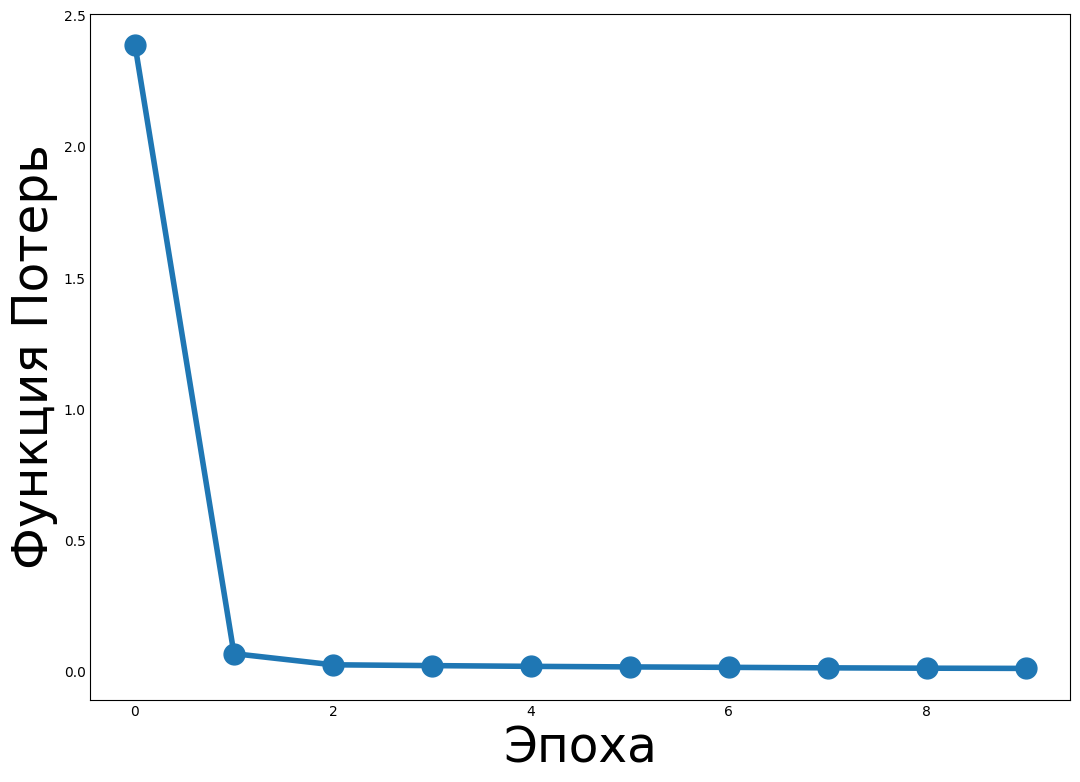

In [ ]:
fig  = plt.figure(figsize=(10,7))

plot_cost(cost)

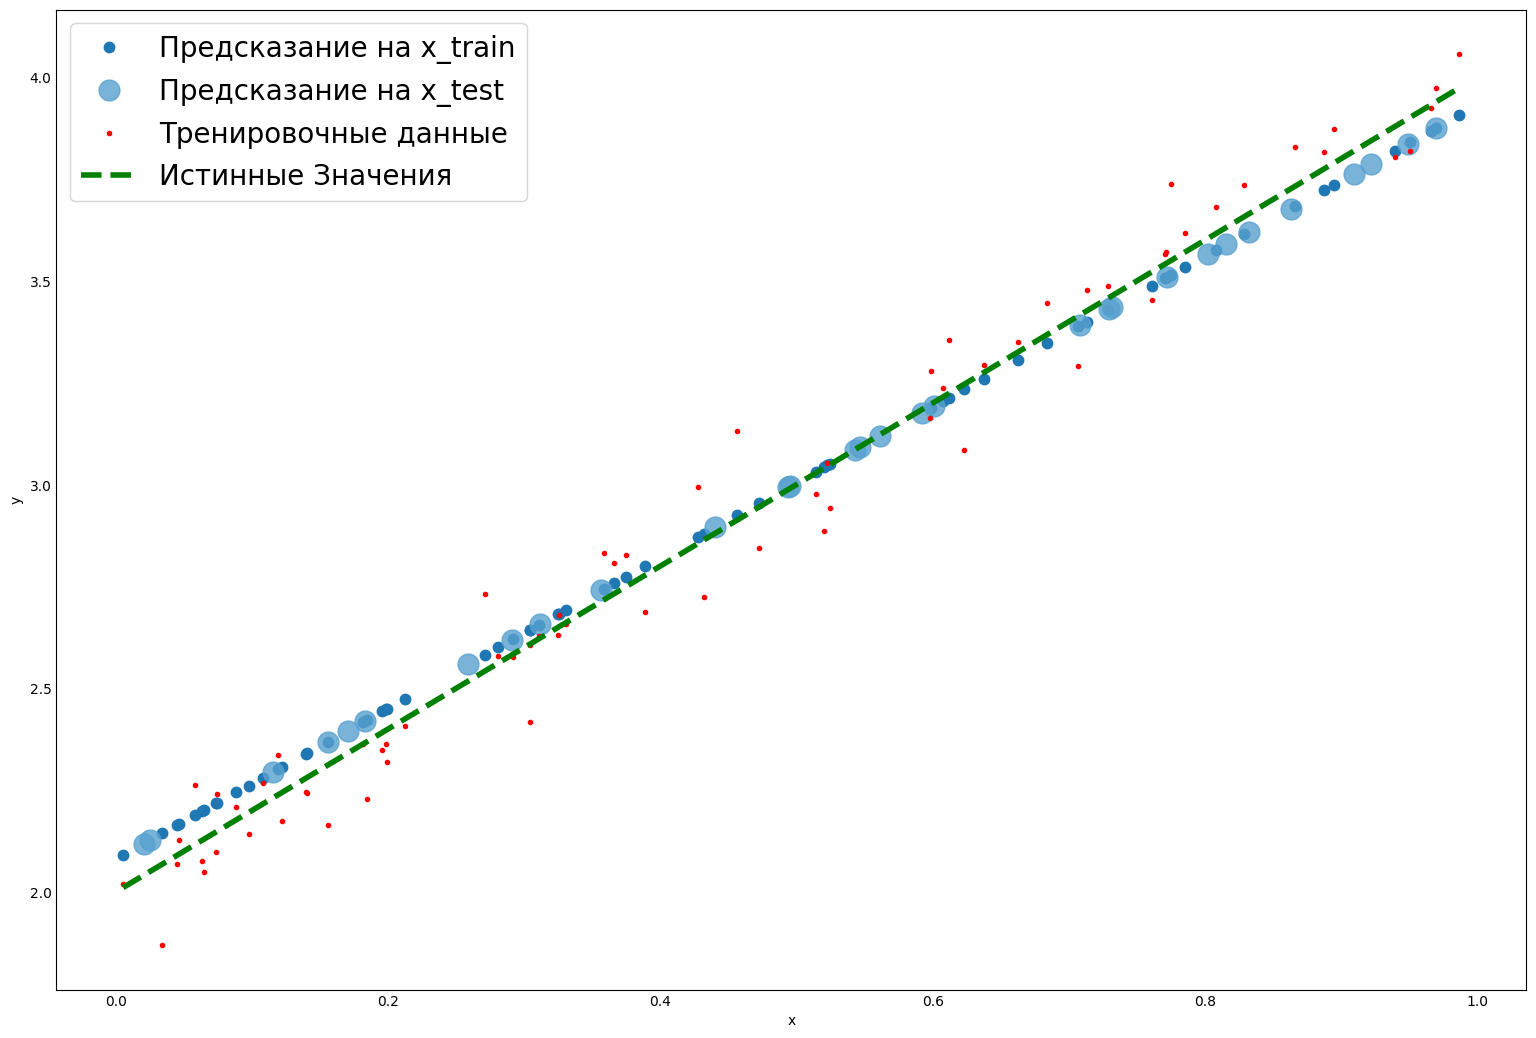

In [ ]:
fig  = plt.figure(figsize=(15,10))

plot_model_weights(x_train, y_train, x_test, x, y_true, weights)

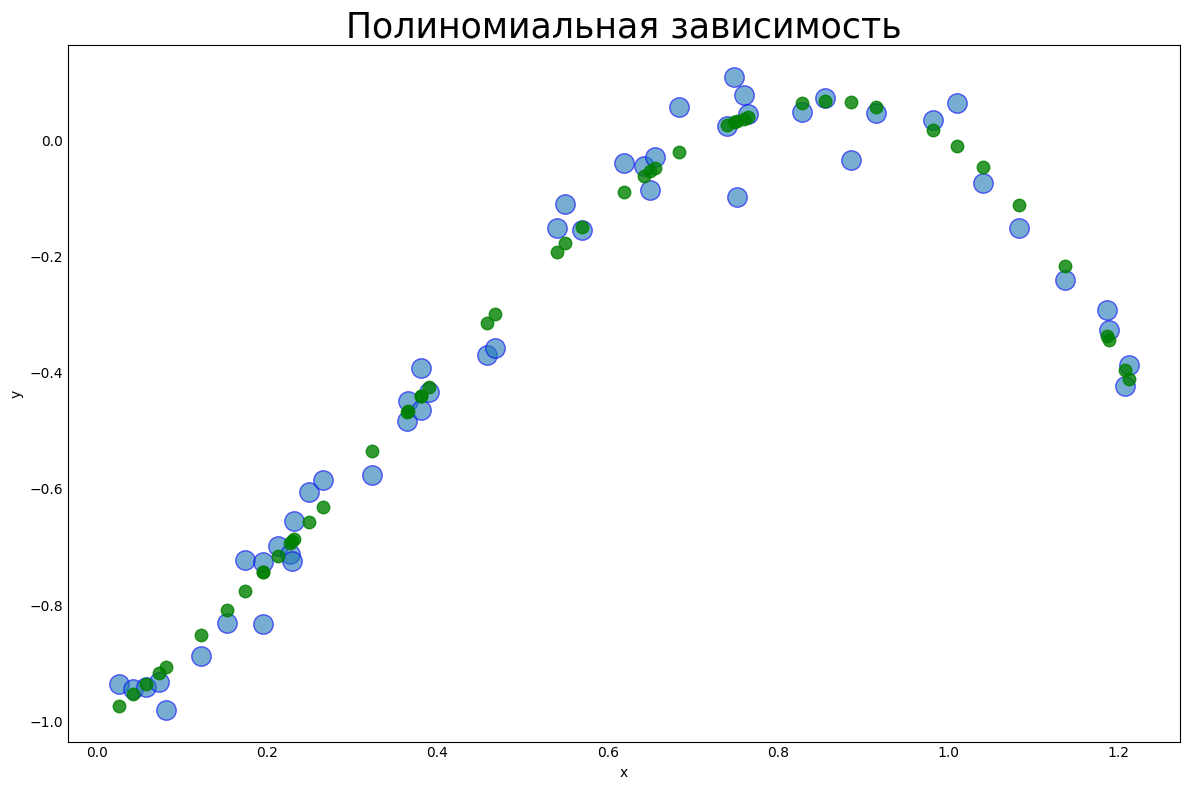

In [ ]:
noise_power = 0.05
y, y_true, x = dataset(a = [1,2,-2], b = -1, f = None, N = 50, x_max =1.25, noise_power = noise_power, seed = 42)
vis_data(y, y_true,x, 'Полиномиальная зависимость')


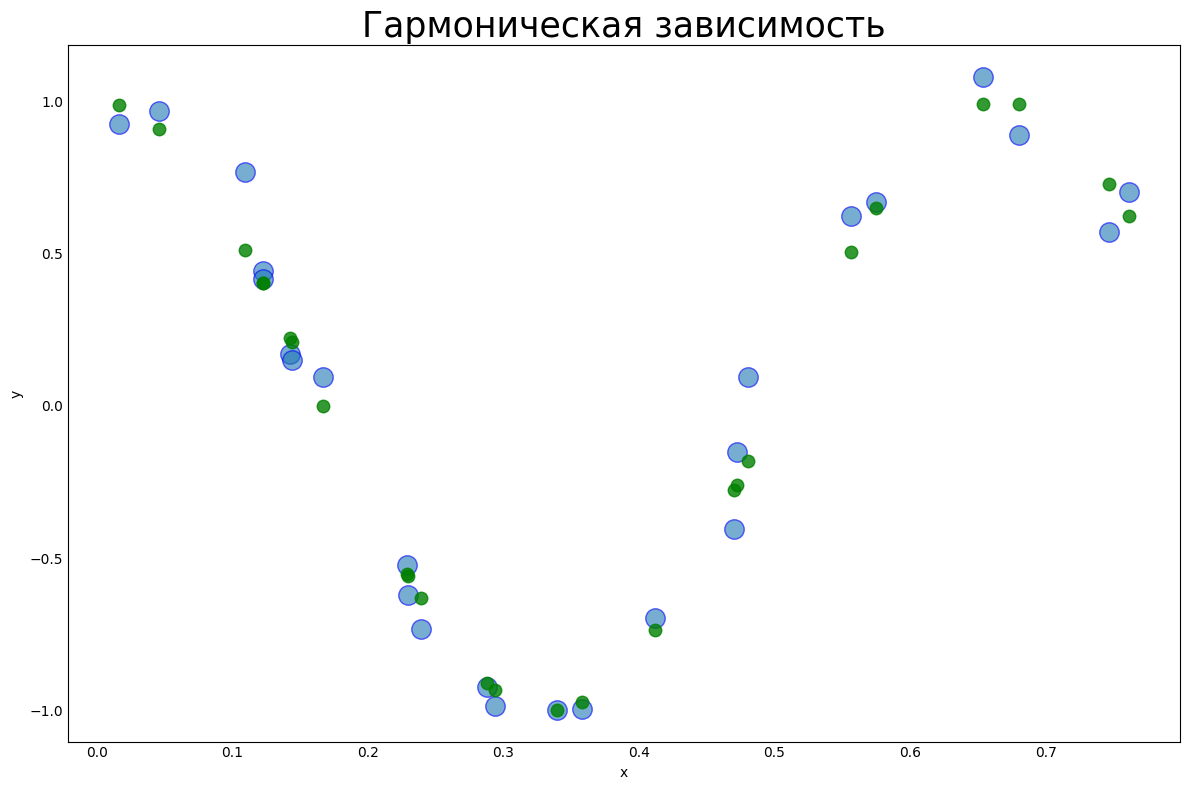

In [ ]:
y, y_true, x = dataset(a = 3*np.pi,b = 0, f = np.cos, N = 25, x_max =np.pi/4, noise_power = 0.1, seed = 42)
vis_data(y, y_true,x, 'Гармоническая зависимость')